# Dereplicator+ evaluation

Evaluation of Dereplicator+ against 5414 annotations matching with spectral library hits.

In [1]:
import pandas as pd     
import numpy as np
from string import ascii_letters
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [138]:
df = pd.read_csv('dereplicator_results_with_fingerprint.tsv',  sep='\t', header=0)
df.columns

Index([u'Name', u'Mass', u'num-amide', u'num-OC', u'num-NC', u'#theo',
       u'#exper', u'TopID', u'Derep+ scr', u'Derep+ rank', u'Derep-g scr',
       u'Derep-g rank', u'Derep scr', u'Derep rank', u'#matches', u'MF1',
       u'#isomers', u'dnp-class', u'SMILES1', u'MF2', u'SMILES2',
       u'fingerprint', u'MFagreement', u'SMILES1_FP1', u'SMILES2_FP2'],
      dtype='object')

In [139]:
#Remove row with empty SMILES2 from dereplicator
df = df.dropna(subset=['SMILES2_FP2'])
df.sort_values(by=['Derep+ scr']).shape
df.shape

(5414, 25)

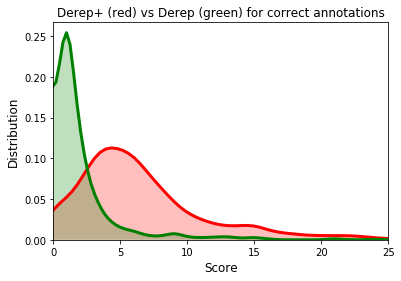

In [104]:
# Correct Derep+ vs Derep
df5 = df.loc[df['fingerprint'] == 1 ]

df5 = df5.sort_values(by=['Derep+ scr'])
p1=sns.distplot(df5['Derep+ scr'], hist = False, kde = True, color = 'r',
                 kde_kws = {'shade': True, 'linewidth': 3})

df5= df5.sort_values(by=['Derep scr'])
p1=sns.distplot(df5['Derep scr'], hist = False, kde = True, color = 'g',
                 kde_kws = {'shade': True, 'linewidth': 3})

p1.set(xlim=(0, 25))

plt.xlabel('Score', size =12)
plt.ylabel('Distribution', size =12)
plt.title('Derep+ (red) vs Derep (green) for correct annotations')
plt.savefig("IMG/derep+_derep_correct_annotation.png", dpi = 300)
plt.show()


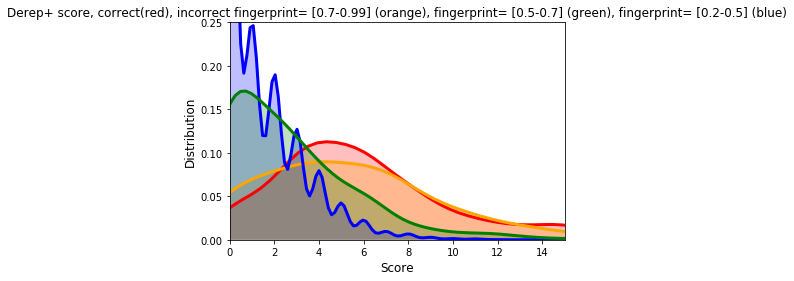

In [105]:
# Results for correct vs incorrect annotations in Derepl+
df5 = df.loc[df['fingerprint'] == 1 ]
df5 = df5.sort_values(by=['Derep+ scr'])
p1=sns.distplot(df5['Derep+ scr'], hist = False, kde = True, color = 'r',
                 kde_kws = {'shade': True, 'linewidth': 3})

df5 = df.loc[df['fingerprint'] < 0.99 ]
df5 = df5.loc[df['fingerprint'] > 0.7 ]

df5 = df5.sort_values(by=['Derep+ scr'])
p1=sns.distplot(df5['Derep+ scr'], hist = False, kde = True, color = 'orange',
                 kde_kws = {'shade': True, 'linewidth': 3})

df5 = df.loc[df['fingerprint'] < 0.5 ]
df5 = df5.loc[df['fingerprint'] > 0.2 ]

df5 = df5.sort_values(by=['Derep+ scr'])
p1=sns.distplot(df5['Derep+ scr'], hist = False, kde = True, color = 'b',
                 kde_kws = {'shade': True, 'linewidth': 3})

df5 = df.loc[df['fingerprint'] < 0.7 ]
df5 = df5.loc[df['fingerprint'] > 0.5 ]

df5 = df5.sort_values(by=['Derep+ scr'])
p1=sns.distplot(df5['Derep+ scr'], hist = False, kde = True, color = 'g',
                 kde_kws = {'shade': True, 'linewidth': 3})

p1.set(xlim=(0, 15), ylim=(0, 0.25))

plt.xlabel('Score', size =12)
plt.ylabel('Distribution', size =12)
plt.title('Derep+ score, correct(red), incorrect fingerprint= [0.7-0.99] (orange), fingerprint= [0.5-0.7] (green), fingerprint= [0.2-0.5] (blue)')
plt.savefig("IMG/derep+_annotations.png", dpi = 300)

plt.show()

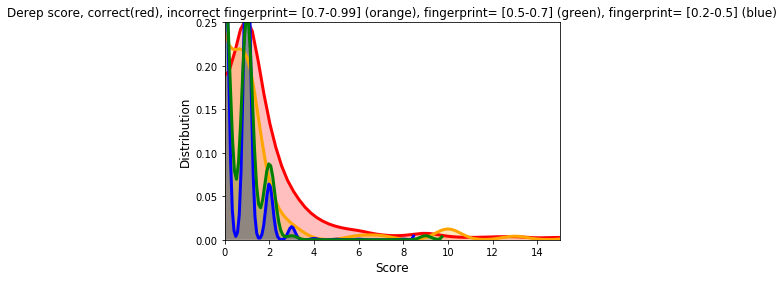

In [106]:
# Results for correct vs incorrect annotations in Derepl
df5 = df.loc[df['fingerprint'] == 1 ]
df5 = df5.sort_values(by=['Derep scr'])
p1=sns.distplot(df5['Derep scr'], hist = False, kde = True, color = 'r',
                 kde_kws = {'shade': True, 'linewidth': 3})

df5 = df.loc[df['fingerprint'] < 0.99 ]
df5 = df5.loc[df['fingerprint'] > 0.7 ]

df5 = df5.sort_values(by=['Derep scr'])
p1=sns.distplot(df5['Derep scr'], hist = False, kde = True, color = 'orange',
                 kde_kws = {'shade': True, 'linewidth': 3})

df5 = df.loc[df['fingerprint'] < 0.5 ]
df5 = df5.loc[df['fingerprint'] > 0.2 ]

df5 = df5.sort_values(by=['Derep scr'])
p1=sns.distplot(df5['Derep scr'], hist = False, kde = True, color = 'b',
                 kde_kws = {'shade': True, 'linewidth': 3})

df5 = df.loc[df['fingerprint'] < 0.7 ]
df5 = df5.loc[df['fingerprint'] > 0.5 ]

df5 = df5.sort_values(by=['Derep scr'])
p1=sns.distplot(df5['Derep scr'], hist = False, kde = True, color = 'g',
                 kde_kws = {'shade': True, 'linewidth': 3})

p1.set(xlim=(0, 15), ylim=(0, 0.25))

plt.xlabel('Score', size =12)
plt.ylabel('Distribution', size =12)
plt.title('Derep score, correct(red), incorrect fingerprint= [0.7-0.99] (orange), fingerprint= [0.5-0.7] (green), fingerprint= [0.2-0.5] (blue)')
plt.savefig("IMG/derep_annotations.png", dpi = 300)
plt.show()

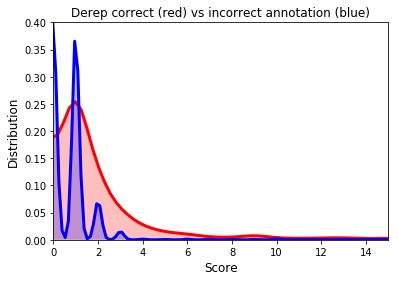

In [109]:
# Results for correct vs incorrect annotations in Derepl
df5 = df.loc[df['fingerprint'] == 1 ]

df5 = df5.sort_values(by=['Derep scr'])
p1=sns.distplot(df5['Derep scr'], hist = False, kde = True, color = 'r',
                 kde_kws = {'shade': True, 'linewidth': 3})

df6 = df.loc[df['fingerprint'] < 1 ]
df6 = df6.sort_values(by=['Derep scr'])
p1=sns.distplot(df6['Derep scr'], hist = False, kde = True, color = 'b',
                 kde_kws = {'shade': True, 'linewidth': 3})

p1.set(xlim=(0, 15), ylim=(0, 0.4))

plt.xlabel('Score', size=12)
plt.ylabel('Distribution', size =12)
plt.title('Derep correct (red) vs incorrect annotation (blue)')
plt.savefig("IMG/derep_correct_incorrect_annotations.png", dpi = 300)
plt.show()

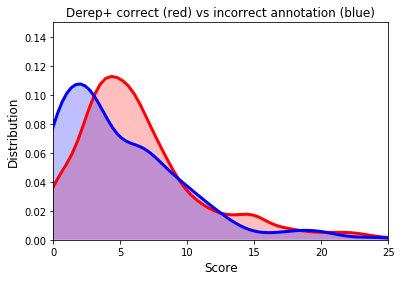

In [131]:
# Results for correct vs incorrect MF in Derep+
#Correct in Derep+
df5 = df.loc[df['MFagreement'] == 'Yes' ]
df5 = df5.loc[df['fingerprint'] == 1.0 ]

df5 = df5.sort_values(by=['Derep+ scr'])
p1=sns.distplot(df5['Derep+ scr'], hist = False, kde = True, color = 'r',
                 kde_kws = {'shade': True, 'linewidth': 3})

# Incorrect MF in Derep+
df5 = df.loc[df['MFagreement'] == 'Yes' ]
df5 = df5.loc[df['fingerprint'] < 0.99 ]
df5 = df5.loc[df['fingerprint'] > 0.5 ]

df5 = df5.sort_values(by=['Derep+ scr'])
p1=sns.distplot(df5['Derep+ scr'], hist = False, kde = True, color = 'b',
                 kde_kws = {'shade': True, 'linewidth': 3})

p1.set(xlim=(0, 25), ylim=(0, 0.15))

plt.xlabel('Score', size=12)
plt.ylabel('Distribution', size =12)
plt.title('Derep+ correct (red) vs incorrect annotation (blue)')
plt.savefig("IMG/derep+_annotations.png", dpi = 300)
plt.show()

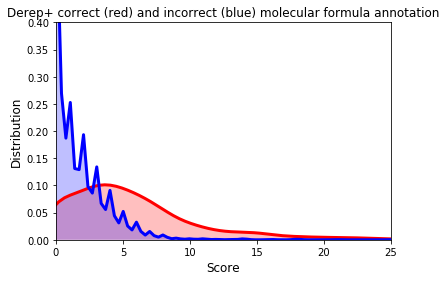

In [141]:
# Results for MF annotation in Derep+
df5 = df.loc[df['MFagreement'] == 'Yes' ]
df5 = df5.sort_values(by=['Derep+ scr'])
p1=sns.distplot(df5['Derep+ scr'], hist = False, kde = True, color = 'r',
                 kde_kws = {'shade': True, 'linewidth': 3})

df5 = df.loc[df['MFagreement'] == 'No' ]
df5 = df5.sort_values(by=['Derep+ scr'])
p1=sns.distplot(df5['Derep+ scr'], hist = False, kde = True, color = 'b',
                 kde_kws = {'shade': True, 'linewidth': 3})

p1.set(xlim=(0, 25), ylim=(0, 0.4))

plt.xlabel('Score', size=12)
plt.ylabel('Distribution', size =12)
plt.title('Derep+ correct (red) and incorrect (blue) molecular formula annotation')
plt.savefig("IMG/derep+_correct_incorrect_MF_annotations.png", dpi = 300)
plt.show()

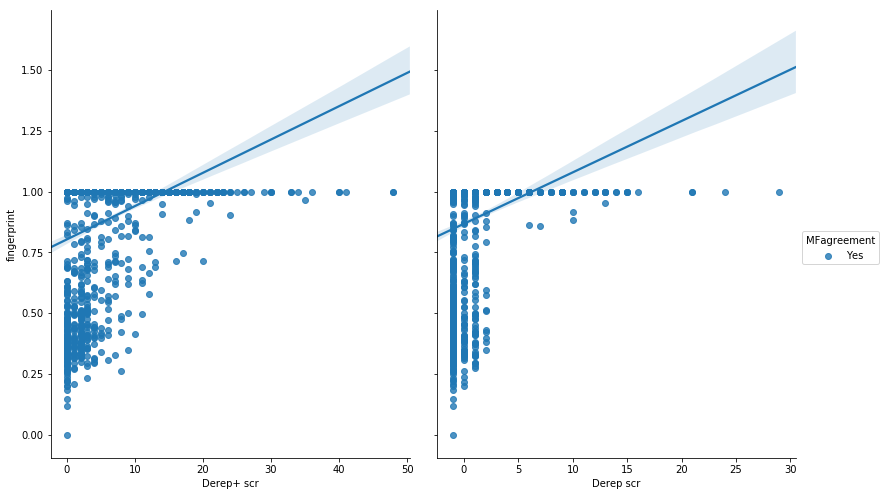

In [111]:
df = df2
sns.pairplot(df2, x_vars=["Derep+ scr", "Derep scr"], y_vars=["fingerprint"],
             hue="MFagreement", size=7, aspect=.8, kind="reg")
plt.savefig("IMG/pairplont_annotations.png", dpi = 300)